In [0]:
!pip install tensorflow 



# Fruit360

In [0]:
from google.colab import files
files.upload()
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d moltean/fruits

Saving kaggle.json to kaggle (1).json
-rw-r--r-- 1 root root 64 May 28 09:42 kaggle.json
 98% 741M/760M [00:05<00:00, 168MB/s]
100% 760M/760M [00:05<00:00, 155MB/s]


In [0]:
import os
import zipfile

local_zip = '/content/fruits.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [0]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


IMG_SIZE = 100

# def format_example(image, label):
#   image = tf.cast(image, tf.float32)
#   image = (image/127.5) - 1
#   image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
#   return image, label

TRAINING_DIR = "/tmp/fruits-360/Training"
training_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(TRAINING_DIR,target_size=(IMG_SIZE,IMG_SIZE))


TEST_DIR = "/tmp/fruits-360/Test"
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=(IMG_SIZE,IMG_SIZE))


#train = train_generator.image_shape(((IMG_SIZE, IMG_SIZE)))
#validation = raw_validation.map(format_example)
#test = validation_generator.map(format_example)
# print(train_generator[0])

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


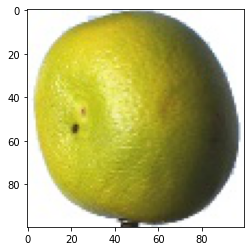

In [0]:
x,y = train_generator.next()
for i in range(0,1):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [0]:
model = tf.keras.models.Sequential([    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),  #98/2 = 49

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2), #47/2 = 23

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2), #21/2 = 10

    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2), #8/2 = 4

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(131, activation='softmax')
    
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)             

In [0]:
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self,epoch,logs={}):
#     if(logs['accuracy']>=0.95):
#       self.model.stop_training=True

# callbacks=myCallback()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator , epochs=10,verbose=1 , validation_data = test_generator )


Epoch 1/10
2116/2116 [==============================] - 77s 36ms/step - loss: 0.9992 - accuracy: 0.7233 - val_loss: 0.3691 - val_accuracy: 0.9038
Epoch 2/10
2116/2116 [==============================] - 77s 36ms/step - loss: 0.2569 - accuracy: 0.9142 - val_loss: 0.3172 - val_accuracy: 0.9302
Epoch 3/10
2116/2116 [==============================] - 77s 36ms/step - loss: 0.1832 - accuracy: 0.9377 - val_loss: 0.3261 - val_accuracy: 0.9339
Epoch 4/10
2116/2116 [==============================] - 76s 36ms/step - loss: 0.1510 - accuracy: 0.9489 - val_loss: 0.2426 - val_accuracy: 0.9628
Epoch 5/10
2116/2116 [==============================] - 76s 36ms/step - loss: 0.1215 - accuracy: 0.9591 - val_loss: 0.2794 - val_accuracy: 0.9571
Epoch 6/10
2116/2116 [==============================] - 76s 36ms/step - loss: 0.1046 - accuracy: 0.9648 - val_loss: 0.2229 - val_accuracy: 0.9666
Epoch 7/10
2116/2116 [==============================] - 76s 36ms/step - loss: 0.0853 - accuracy: 0.9712 - val_loss: 0.2373 -

Text(0.5, 1.0, 'Training and validation loss')

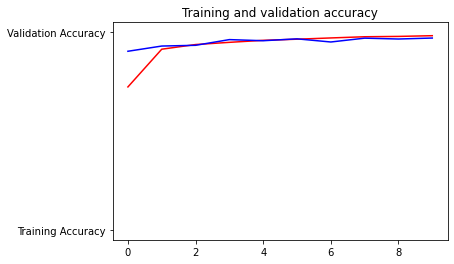

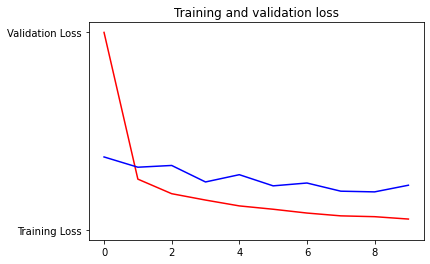

In [0]:
% matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [0]:
train_generator.class_indices.keys() , train_generator.class_indices.values()


(dict_keys(['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Marac

In [0]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images)

  maximum  = max(classes[0])
  index = classes.argmax()
  print(index)

  for name,inde in train_generator.class_indices.items():
    if inde == index:
        print(name)

Saving bans.jpg to bans (7).jpg
17
Banana Lady Finger


In [0]:
model.save("fruits_model.h5")